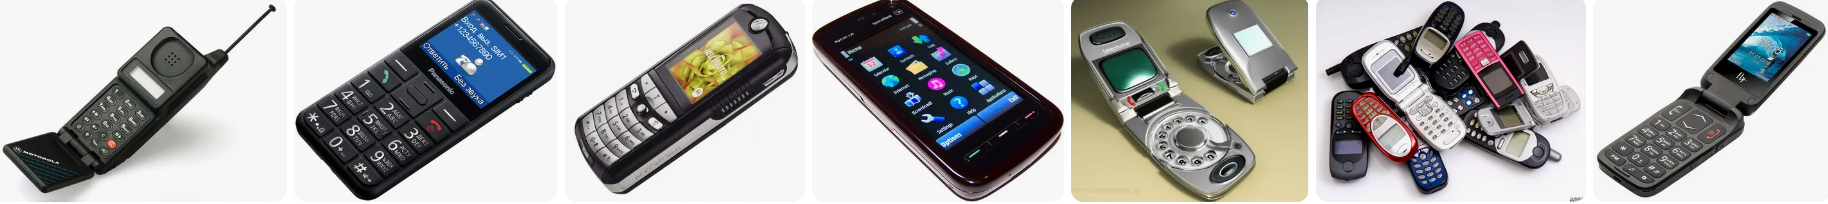

# Анализ тарифных планов

Федеральный оператор сотовой связи предлагает клиентам два тарифных плана: «Смарт» и «Ультра».\
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.\
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов (500 человек) за 2018-й год.\
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

### Откройте файл с данными и изучите общую информацию

**Задание 1.** Откройте файл `/datasets/calls.csv`, сохраните датафрейм в переменную `calls`.

In [2]:
calls = pd.read_csv('../../05 статистический анализ данных/project/calls.csv')

**Задание 2.** Выведите первые 5 строк датафрейма `calls`.

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**Задание 3.** Выведите основную информацию для датафрейма `calls` с помощью метода `info()`.

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Задание 4.** С помощью метода `hist()` выведите гистограмму для столбца с продолжительностью звонков. Подумайте о том, как распределены данные.

<AxesSubplot:>

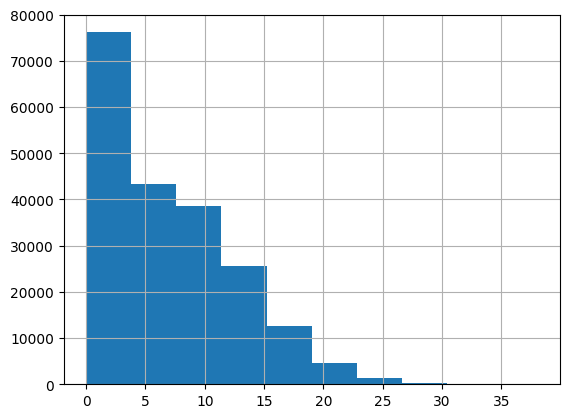

In [5]:
calls['duration'].hist()

**Задание 5.** Откройте файл `/datasets/internet.csv`, сохраните датафрейм в переменную `sessions`.

In [6]:
sessions = pd.read_csv('../../05 статистический анализ данных/project/internet.csv')

**Задание 6.** Выведите первые 5 строк датафрейма `sessions`.

In [7]:
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


**Задание 7.** Выведите основную информацию для датафрейма sessions с помощью метода `info()`. 

In [8]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Задание 8.** С помощью метода `hist()` выведите гистограмму для столбца с количеством потраченных мегабайт.

<AxesSubplot:>

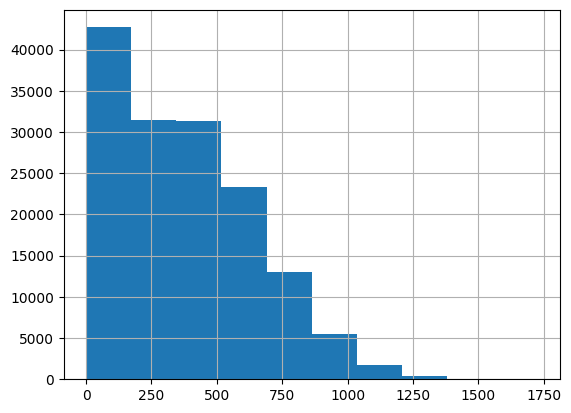

In [9]:
sessions['mb_used'].hist()

**Задание 9.** Откройте файл `/datasets/messages.csv`, сохраните датафрейм в переменную `messages`.

In [10]:
messages = pd.read_csv('../../05 статистический анализ данных/project/messages.csv')

**Задание 10.** Выведите первые 5 строк датафрейма `messages`.

In [11]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**Задание 11.** Выведите основную информацию для датафрейма `messages` с помощью метода `info()`. 

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Задание 12.** Откройте файл `/datasets/tariffs.csv`, сохраните датафрейм в переменную `tariffs`.

In [13]:
tariffs = pd.read_csv('../../05 статистический анализ данных/project/tariffs.csv')

**Задание 13.** Выведите весь датафрейм `tariffs`.

In [14]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Задание 14.** Выведите основную информацию для датафрейма `tariffs` с помощью метода `info()`.

In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Задание 15.** Откройте файл `/datasets/users.csv`, сохраните датафрейм в переменную `users`.

In [16]:
users = pd.read_csv('../../05 статистический анализ данных/project/users.csv')

**Задание 16.** Выведите первые 5 строк датафрейма `users`.

In [17]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Задание 17.** Выведите основную информацию для датафрейма `users` с помощью метода `info()`.

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
# доли тарифов
users['tariff'].value_counts(normalize=True)

smart    0.702
ultra    0.298
Name: tariff, dtype: float64

### Подготовьте данные

**Задание 18.**  Приведите столбцы

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

к новому типу с помощью метода `to_datetime()`.

In [20]:
users['reg_date']        = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['churn_date']      = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
calls['call_date']       = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
sessions['session_date'] = pd.to_datetime(sessions['session_date'],format='%Y-%m-%d')

**Задание 19.** В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Однако в столбце `duration` датафрейма `calls` значения дробные. Округлите значения столбца `duration` вверх с помощью метода `numpy.ceil()` и приведите столбец `duration` к типу `int`.

In [21]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

**Задание 20.** Удалите столбец `Unnamed: 0` из датафрейма `sessions`. Столбец с таким названием возникает, когда данные сохраняют с указанием индекса (`df.to_csv(..., index=column)`). Он сейчас не понадобится.

In [22]:
sessions.drop('Unnamed: 0',axis=1,inplace=True)

**Задание 21.** Создайте столбец `month` в датафрейме `calls` с номером месяца из столбца `call_date`.

In [23]:
calls['month'] = calls['call_date'].dt.month

**Задание 22.** Создайте столбец `month` в датафрейме `messages` с номером месяца из столбца `message_date`.

In [24]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

**Задание 23.** Создайте столбец `month` в датафрейме `sessions` с номером месяца из столбца `session_date`.

In [25]:
sessions['month'] = sessions['session_date'].dt.month

**Задание 24.** Посчитайте количество сделанных звонков разговора для каждого пользователя по месяцам.

In [26]:
calls_per_month = calls.groupby(['user_id','month']).agg(calls=('duration','count'))

In [27]:
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

**Задание 25.** Посчитайте количество израсходованных минут разговора для каждого пользователя по месяцам и сохраните в переменную `minutes_per_month`. Вам понадобится

- сгруппировать датафрейм с информацией о звонках по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- после группировки выбрать столбец `duration`
- затем применить метод для подсчёта суммы.

Выведите первые 30 строчек `minutes_per_month`.

In [28]:
minutes_per_month = calls.groupby(['user_id','month']).agg(minutes=('duration', 'sum'))

In [29]:
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

**Задание 26.** Посчитайте количество отправленных сообщений по месяцам для каждого пользователя и сохраните в переменную `messages_per_month`. Вам понадобится

- сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- после группировки выбрать столбец `message_date`;
- затем применить метод для подсчёта количества.

Выведите первые 30 строчек `messages_per_month`.

In [30]:
# подсчёт количества отправленных сообщений для каждого пользователя по месяцам
messages_per_month = messages.groupby(['user_id','month']).agg(messages=('message_date','count'))

In [31]:
# вывод первых 30 строк на экран
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

**Задание 27.** Посчитайте количество потраченных мегабайт по месяцам для каждого пользователя и сохраните в переменную `sessions_per_month`. Вам понадобится

- сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- затем применить метод для подсчёта суммы: `.agg({'mb_used': 'sum'})`

In [32]:
# подсчёт потраченных мегабайт для каждого пользователя по месяцам
sessions_per_month = sessions.groupby(['user_id','month']).agg({'mb_used':'sum'})

In [33]:
# вывод первых 30 строк на экран
sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

### Анализ данных и подсчёт выручки

Объединяем все посчитанные выше значения в один датафрейм `user_behavior`.
Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [34]:
# процент пользователей, расторгнувших договор
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Расторгли договор 7.6% клиентов из датасета

In [35]:
user_behavior = calls_per_month.                                                                  merge(
                messages_per_month, left_index=True, right_index=True, how='outer').              merge(
                sessions_per_month, left_index=True, right_index=True, how='outer').              merge(
                minutes_per_month,  left_index=True, right_index=True, how='outer').reset_index().merge(
                users,              on='user_id',                      how='left' )

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [36]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполним образовавшиеся пропуски в данных:

In [37]:
user_behavior['calls']    = user_behavior['calls'].   fillna(0)
user_behavior['minutes']  = user_behavior['minutes']. fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used']  = user_behavior['mb_used']. fillna(0)

Присоединяем информацию о тарифах

In [38]:
# переименование столбца tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [39]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

Считаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф


In [40]:
user_behavior['paid_minutes']  = user_behavior['minutes']  - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb']       = user_behavior['mb_used']  - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`

In [41]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Считаем выручку за минуты разговора, сообщения и интернет

In [42]:
user_behavior['cost_minutes']  = user_behavior['paid_minutes']  * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb']       = user_behavior['paid_gb']       * user_behavior['rub_per_gb']

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбец `total_cost`

In [43]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

In [44]:
user_behavior.head(2)

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,...,rub_per_message,rub_per_minute,paid_minutes,paid_messages,paid_mb,paid_gb,cost_minutes,cost_messages,cost_gb,total_cost
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0


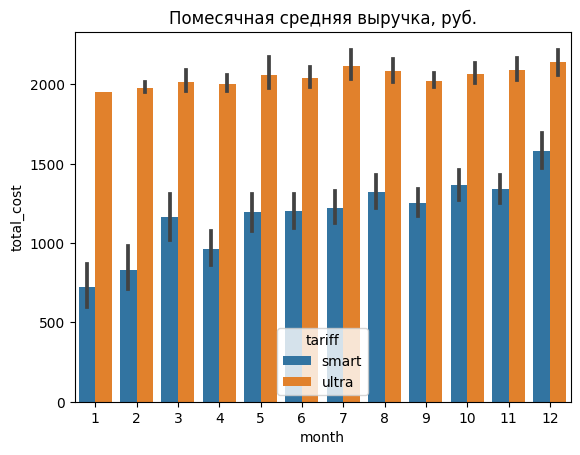

In [45]:
sns.barplot(data=user_behavior, x='month', hue='tariff', y='total_cost', hue_order=['smart','ultra'])
plt.title('Помесячная средняя выручка, руб.'); plt.show()

In [46]:
# годовые суммы выручек по тарифам
user_behavior.groupby(['tariff'])['total_cost'].sum()

tariff
smart    2875351.0
ultra    2039100.0
Name: total_cost, dtype: float64

In [47]:
# помесячные выручки, разделённые на тарифы
month_tariff_cost = user_behavior.groupby(['month', 'tariff'])['total_cost'].sum().reset_index()
month_tariff_cost.head(3)

,month,tariff,total_cost
0,1,smart,24525.0
1,1,ultra,17550.0
2,2,smart,48001.0


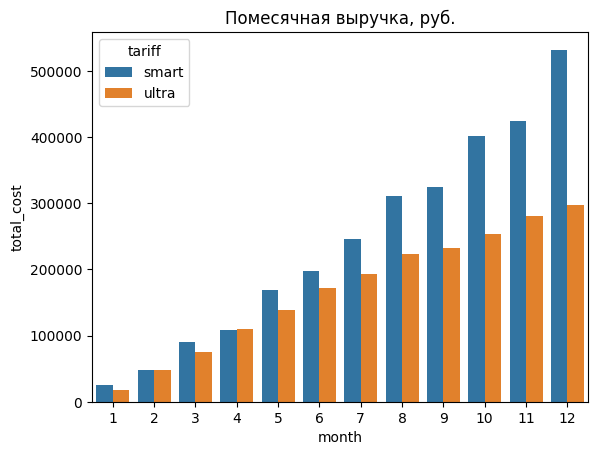

In [48]:
sns.barplot(data=month_tariff_cost, x='month', hue='tariff', y='total_cost')
plt.title('Помесячная выручка, руб.'); plt.show()

Датафрейм `stats_df` для каждой пары "месяц-тариф" будет хранить основные характеристики

In [49]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(index  =['month', 'tariff'], 
                                     values =['calls', 'minutes', 'messages', 'mb_used'],
                                     aggfunc=['mean', 'std', 'median']
                                     ).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(6)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0


Распределение среднего количества звонков по видам тарифов и месяцам

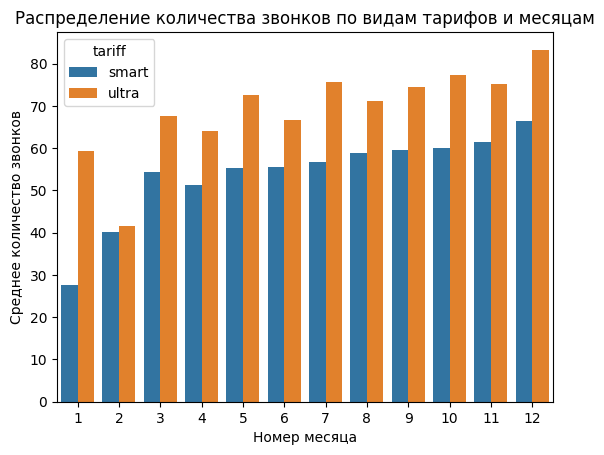

In [50]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df)

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

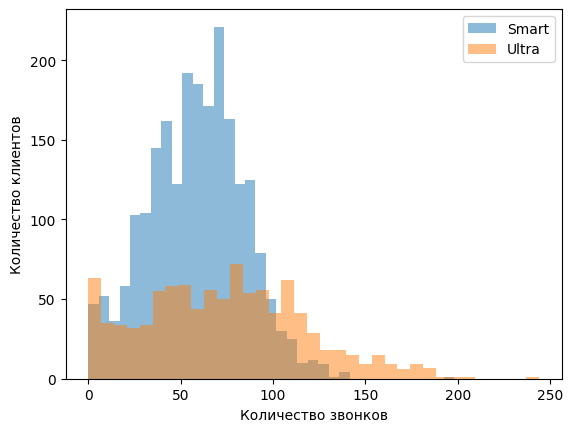

In [51]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков'); plt.ylabel('Количество клиентов'); plt.show()

Распределение средней продолжительности звонков по видам тарифов и месяцам

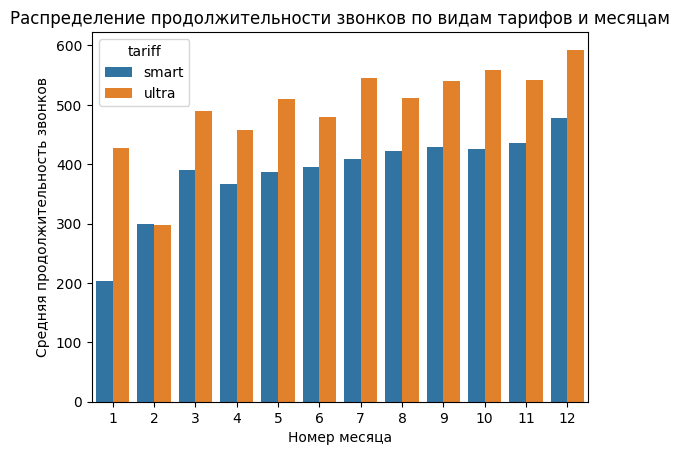

In [52]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df)

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

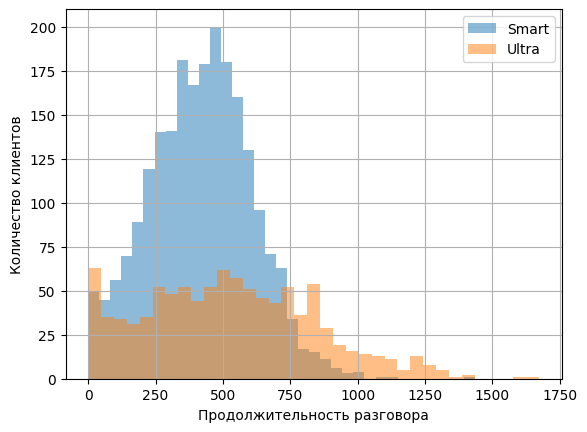

In [53]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5)
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Продолжительность разговора'); plt.ylabel('Количество клиентов'); plt.show()

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Распределение среднего количества сообщений по видам тарифов и месяцам

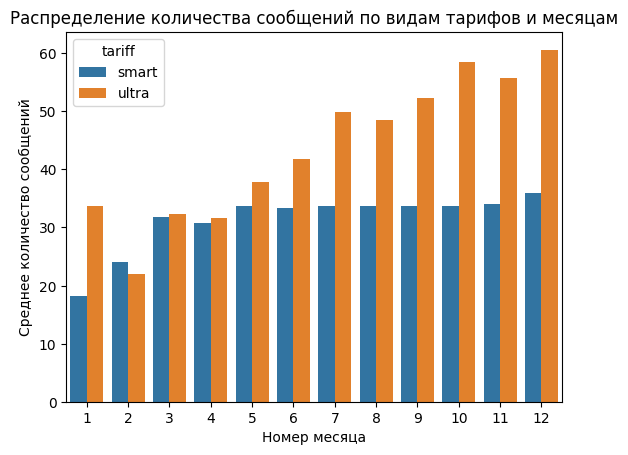

In [54]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

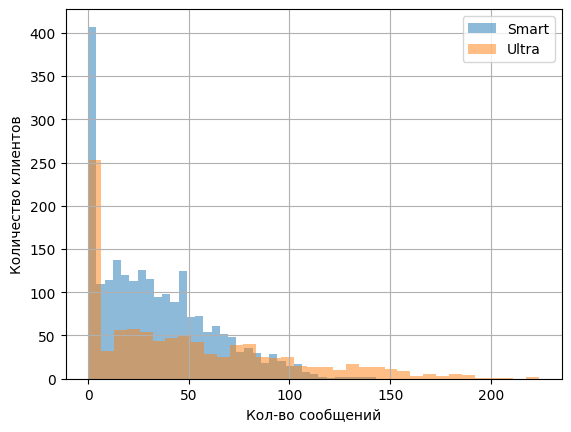

In [55]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5)
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Кол-во сообщений'); plt.ylabel('Количество клиентов'); plt.show()

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений Ultra в течение года растет; Smart - практически не изменяется.

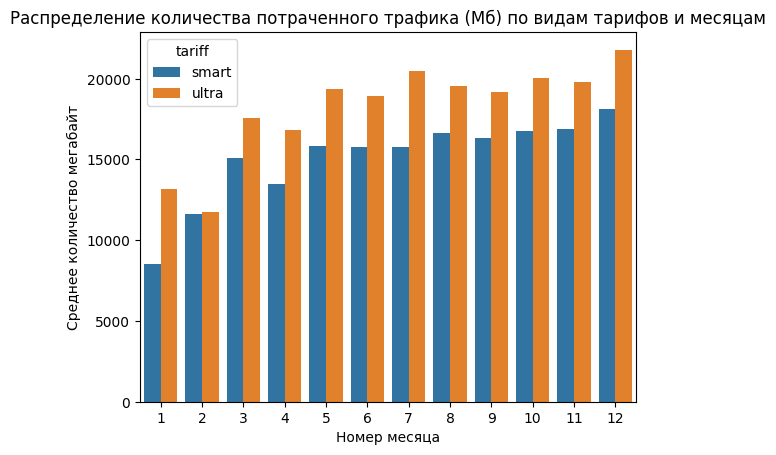

In [56]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra

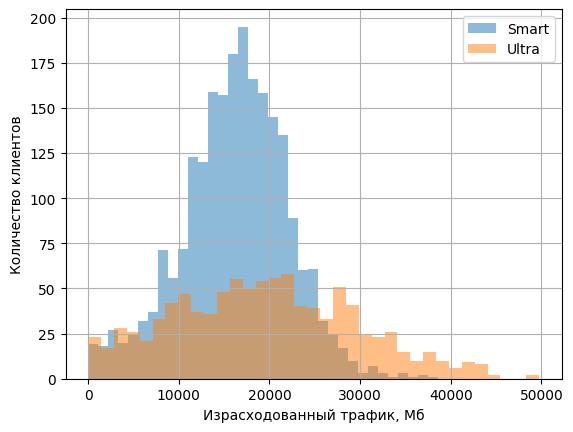

In [57]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5)
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Израсходованный трафик, Мб'); plt.ylabel('Количество клиентов'); plt.show()

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

### Проверка гипотез

**Задание 28.** Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"
alpha = 0.05
```

In [58]:
#вызов метода для проверки гипотезы
results = st.ttest_ind(user_behavior.loc[user_behavior['tariff']=='ultra','total_cost'],
                       user_behavior.loc[user_behavior['tariff']=='smart','total_cost'],
                       equal_var=False)

# уровень значимости
alpha = 0.05

print (f'p-value = {results.pvalue:.4f}, statistic = {results.statistic:.4f}')

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-value = 0.0000, statistic = 37.0190
Отвергаем нулевую гипотезу


**Задание 29.** Проверка гипотезы: средняя выручка с пользователей из Москвы отличается от выручки с пользователей других регионов;

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы
alpha = 0.05
```

In [59]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(user_behavior[user_behavior['city']=='Москва']['total_cost'],
                       user_behavior[user_behavior['city']!='Москва']['total_cost'], equal_var=False)
# задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print (f'p-value = {results.pvalue:.4f}, statistic = {results.statistic:.4f}')
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-value = 0.5257, statistic = 0.6348
Не получилось отвергнуть нулевую гипотезу


При условии верности нулевой гипотезы, вероятность получить существующую разницу между средними выборок равна 52.6%.\
Это значительно выше уровня значимости в 5%, поэтому нулевую гипотезу не отвергаем.\
Средняя выручка пользователей из Москвы вполне может не отличаться от средней выручки пользователей из других регионов.

Допустим, H_1 звучала бы таким образом: Выручка (total_cost) пользователей из Москвы > выручка (total_cost) пользователей не из Москвы.


Так как statistic положительная, среднее выборки москвичей больше среднего дохода от не москвичей.\
Вероятность получить существующую разницу в средних (либо бОльшую), а также то, что средний доход от москвича выше - 26.3% (p-value/2). Много выше уровня значимости.\
Нулевую гипотезу не отвергаем.

### Вывод

Одназначного ответа на вопрос, какой тариф лучше - нет.\
Каждый из двух тарифов закрывает свою целевую аудиторию:\
\- `smart` - люди с меньшей потребностью в услугах связи;\
\- `ultra` - с большей.

Из анализа следует:
* годовая суммарная выручка по `smart` на 41% выше `ultra`; на это заключение можно опираться только, если выборка в 500 абонентов стратифицирована относительно всей генеральной совокупности по тарифу, если отбор производился случайно по всей совокупности;
* в течение года выручка от `smart` возрастает линейно быстрее чем по `ultra`;
* средняя выручка по абонентнам у `ultra` примерно в 2 раза выше чем по `smart`; в течение года `ultra` почти не меняется, а `smart` растёт;
* статистическая проверка гипотез подтвердила, что средние выручки тарифов отличаются друг от друга;
* средние выручки не зависят от того абонент в Москве или в другом регионе.

Таким образом, суммарно денежных средств больше приносит `smart` за счёт большего числа абонентов. Но средняя выручка выше у `ultra`.

Сотовому оператору удобнее работать с меньшим числом абонентов `ultra` - меньше затрат на обслуживание при стабильной выручке.\
В то же время нельзя терять целевую аудиторию, которой требуется меньше мобильного общения (бОльшая доля выручки).

Рекомендации:
* делать отдельные рекламы для каждой целевой аудитории; для массового сегмента продвигать `smart`, а для бизнеса `ultra`;
* смотреть динамику разговора абонента; если наблюдаем рост потребления минут/трафика, рекомендуем перейти со `smart` на `ultra`;
* учитывая, что за последней год наблюдается лучшая динамика по `smart`, сохранить и возможно усилить существующие рекламные каналы по этому тарифу.